In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        result = chardet.detect(file.read())
    return result['encoding']

# Replace 'your_file.txt' with the actual path to your file
file_path = 'C:\\Users\\User\\Python_practice_scripts\\DDoSdata.csv\\DDoSdata.csv'
encoding = detect_encoding(file_path)

print(f"The encoding of the file is: {encoding}")

The encoding of the file is: ascii


In [47]:
data1=pd.read_csv('C:\\Users\\User\\Python_practice_scripts\\DDoSdata.csv\\DDoSdata.csv')
col=list(data1.columns.values)
data1=data1[:1000000]

C:\Users\User\AppData\Local\Temp\ipykernel_33068\34529906.py:1: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('C:\\Users\\User\\Python_practice_scripts\\DDoSdata.csv\\DDoSdata.csv')


In [48]:
target1 = data1["subcategory"]
data1 = data1.drop(["attack", "category","subcategory"], axis=1)

In [49]:
target1[:2]

0    HTTP
1    HTTP
Name: subcategory, dtype: object

In [50]:
from collections import Counter
Counter(target1)

Counter({'HTTP': 989, 'TCP': 977380, 'UDP': 21631})

In [51]:
from sklearn import preprocessing
import pandas as pd

data1= data1.astype(str)
le = preprocessing.LabelEncoder()
dataF=data1.apply(le.fit_transform)

In [52]:
dataF[:2]

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
0,0,0,129586,0,0,2,0,3,49017,4,...,285,664,13399,8812,26,32,41682,9090,340,296
1,1,1,129587,0,0,2,0,3,49019,4,...,285,664,13399,8812,26,32,41683,9090,340,296


In [54]:
#Converting the column with object type to float

import pandas as pd


# Identify columns with data type "object"
object_columns = data1.select_dtypes(include=['object']).columns

# Convert selected object columns to float
for column in object_columns:
    try:
        data1[column] = data1[column].astype(float)
    except ValueError:
        print(f"Unable to convert column '{column}' to float. Check for non-numeric values.")




Unable to convert column 'flgs' to float. Check for non-numeric values.
Unable to convert column 'proto' to float. Check for non-numeric values.
Unable to convert column 'saddr' to float. Check for non-numeric values.
Unable to convert column 'sport' to float. Check for non-numeric values.
Unable to convert column 'daddr' to float. Check for non-numeric values.
Unable to convert column 'dport' to float. Check for non-numeric values.
Unable to convert column 'state' to float. Check for non-numeric values.


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataF, target1, test_size=0.30, random_state=1, stratify=target1, shuffle=True)

In [56]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700000, 44)
Number transactions y_train dataset:  (700000,)
Number transactions X_test dataset:  (300000, 44)
Number transactions y_test dataset:  (300000,)


In [57]:
X_train[:2]

,Unnamed: 0,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,...,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP
749278,749278,749278,101178,4,1,2,0,2,48845,4,...,452,460,10326,6318,2,60,18515,6445,324,59
497215,497215,497215,71607,4,1,2,0,2,12693,4,...,648,658,12445,8156,2,86,29662,8375,729,618


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
a = GradientBoostingClassifier(max_depth=8, learning_rate=0.1, n_estimators=50, random_state=2)
print("GBM")
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

GBM
1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00    293214
         UDP       1.00      1.00      1.00      6489

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000

[[   297      0      0]
 [     0 293214      0]
 [     0      0   6489]]


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
a =  ExtraTreesClassifier(n_estimators=250, random_state=27, max_depth=150)
print("ETC")
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


ETC
1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
a =  RandomForestClassifier(n_estimators=200, random_state=2,max_depth=150) 
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))


1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


In [26]:
Counter(dataF['flgs'])

Counter({0: 23461, 4: 16732, 1: 3, 2: 15, 3: 9789})

In [21]:
from sklearn.linear_model import SGDClassifier
a = SGDClassifier()
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


In [27]:
from sklearn.naive_bayes import GaussianNB
a = GaussianNB()
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier()
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


In [29]:
from sklearn.linear_model import LogisticRegression
a=LogisticRegression(random_state=1000, solver='sag',multi_class='ovr',C=2.0)
a_pred = a.fit(X_train, y_train)
pred=a_pred.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]


>lr 1.000 (0.000)
>cart 1.000 (0.000)
>svm 1.000 (0.000)
>bayes 1.000 (0.000)


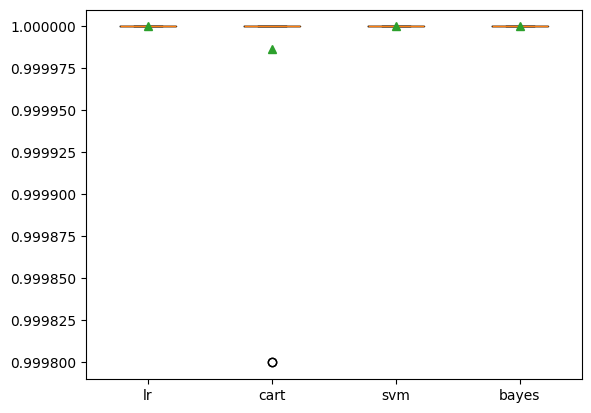

In [31]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
	return dataF, target1

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()
#	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [32]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [44]:
clf = SGDClassifier(loss='hinge')
lr=LogisticRegression()

Classifiers = [
    CalibratedClassifierCV(clf, cv=5, method='isotonic'),
    VotingClassifier(estimators=[('lr', lr), ('clf', clf),],voting='hard'),
    LogisticRegression( solver='liblinear',multi_class='ovr',C=3.0),
    ExtraTreesClassifier(n_estimators=500, random_state=5),
    SVC(kernel='linear', C=2.0, random_state=500),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200,max_depth=100),
    GradientBoostingClassifier(max_depth=100, learning_rate=0.1, n_estimators=50, random_state=52),
    AdaBoostClassifier(n_estimators=100, random_state=5),
    GaussianNB(),
    linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
]

In [46]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(X_train,y_train)
    pred = fit.predict(X_test)
   
    print(accuracy_score(y_test,pred))
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred)) 
    print("==========================================")

1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]
1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

[[  297     0]
 [    0 14703]]
1.0
              precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00       297
         TCP       1.00      1.00      1.00     14703

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
